## Events and Probabilities

Key definitions: 
- sample sapce $\Omega$
- $\sigma$-field $\mathcal{F}$
- probability measure $\mathbb{P}$ on $(\Omega, \mathcal{F})$
- probability space $(\Omega, \mathcal{F}, \mathbb{P})$


### Sample and Counting

`Birthday problem`: there are k people in the room, assume people's birthdays are independent. What's the probability that at least one pair of people in the group have the same birthday?

Let's count the complement: the number of ways to assign birthdays to k people such that no two people share a birthday. This amounts to sampling the 365 days of the year _without_ replacement. Therefore the probability of no birthday mathces in a group of k people is:
$$P(\text{no  match}) = \frac{365\cdot 364 \cdots (365-k+1)}{365^k}$$, which means that each one takes a day off (or take a position of one day). And the probability of at least one birthday match is:
$$P(\text{at least 1 birthday match}) = 1 - P(\text{no match})$$

`de Montmort's matching problem`: we can use _inclusion-exclusion_ to solve it:
$$P(\cup_{i=1}^n A_i) = \sum_{i}P(A_i) - \sum_{i<j}P(A_i \cap A_j) + \sum_{i<j<k}P(A_i\cap A_j \cap A_k) - \cdots + (-1)^{n+1}P(A_1 \cap \cdots \cap A_n)$$ 


`Taylor seires` of a real or complex-valued function $f(x)$ that is _infinitely differentiable_ at a number $a$ is:
$$\sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n$$

In [1]:
# import all essential packages
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.functions import sin, cos, ln
import matplotlib.pyplot as plt

-x/4 + (x - 5)**6/24576 - (x - 5)**5/5120 + (x - 5)**4/1024 - (x - 5)**3/192 + (x - 5)**2/32 - log(4) + 5/4 + I*pi

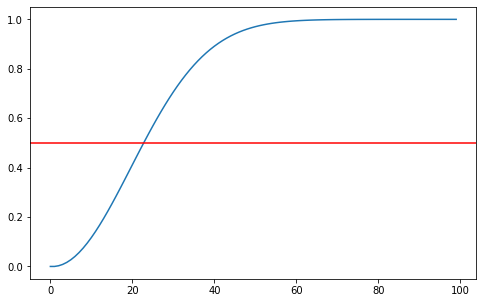

In [3]:
# sampling with replacement
np.random.choice(10, 3)
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
np.random.choice(letters, 3)

# sampling without replacement
np.random.choice(10, 3, replace=False)
np.random.choice(letters, 3, replace=False)

# permutation
np.random.permutation(10)
arr = np.arange(9).reshape((3, 3))
np.random.permutation(arr)

# n choose k 
math.comb(5, 2)

# factorial
math.factorial(5)

# birthday problem function 1 
def birth_match(k):
    # wanring: this function is not vectorilized
    vl = math.factorial(365)/math.factorial(365-k)
    p_no_match = vl/(365**k)
    p_math = 1 - p_no_match
    return p_math

birth_match(22)

def birth_match(k):
    k = float(k)  # it's very important to convert k as float, otherwise np.prod() will return the negative value
    # however, using floats will lose precision.
    vl = np.arange(365-k+1, 366) 
    p_no_match = np.prod(vl)/(365**k)
    p_math = 1 - p_no_match
    return p_math

birth_match(22)

# np.prod explode
np.prod(np.array(np.arange(365-23+1, 366)))

# plot the birthday match function
import matplotlib.pyplot as plt
kdays = np.arange(0, 100)
prob = []
for k in kdays:
    prob.append(birth_match(k))
plt.figure(figsize=(8, 5))
plt.plot(kdays, prob)
plt.axhline(y=0.5,color='r')

# de montmor's matching problem simulation
n = 100 # 100 cards
prob_list = []
trails = 10000
for _ in range(trails):  # do 10 thousands times
    res = sum(np.random.choice(n, n, replace=False) == np.arange(100))
    prob_list.append(res)
sum(np.array(prob_list)>=1)/trails

1-1/math.e  # should be closed to this number


# Taylor Series
def taylor(function, x0, n, x=sy.Symbol('x')):
    # does not work for sin or cos as you need convert to float with pi
    i = 0 
    p = 0 
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(math.factorial(i))*(x - x0)**i
        i += 1
    return p

# Define the variable and the function to approximate
x = sy.Symbol('x')
x = 1/(1-x)
taylor(x, 5, 6)
x = ln(x)
taylor(x, 5, 6)